<ipython-input-3-97aa8a5fe3b5>:39: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='red', marker='x', cmap='coolwarm', edgecolor='k', label='Label 1 (x)')
<ipython-input-3-97aa8a5fe3b5>:39: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='red', marker='x', cmap='coolwarm', edgecolor='k', label='Label 1 (x)')
<ipython-input-3-97aa8a5fe3b5>:42: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='blue', marker='o', cmap='coolwarm', edgecolor='k', label='Label 0 (o)')


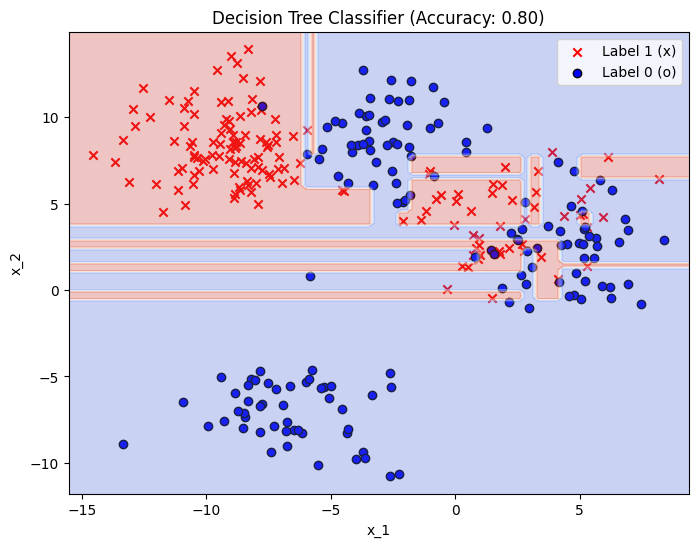

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate synthetic 2-labeled data with 6 blobs
X, y = make_blobs(n_samples=300, centers=6, random_state=42, cluster_std=2.0)

# Map labels to 0 or 1 (binary classification)
y = np.where(y < 3, 0, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict labels for the test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Plot the decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the data points and decision boundary
plt.figure(figsize=(8, 6))

# Plot data points with label 1 as "x"
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='red', marker='x', cmap='coolwarm', edgecolor='k', label='Label 1 (x)')

# Plot data points with label 0 as "o"
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='blue', marker='o', cmap='coolwarm', edgecolor='k', label='Label 0 (o)')

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.title(f'Decision Tree Classifier (Accuracy: {accuracy:.2f})')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.legend()
plt.show()


<ipython-input-1-4e1213d2ad20>:52: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  scatter1_base = axes[0].scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='red', marker='x', cmap='coolwarm', edgecolor='k', label='Label 1 (x)')
<ipython-input-1-4e1213d2ad20>:52: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter1_base = axes[0].scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='red', marker='x', cmap='coolwarm', edgecolor='k', label='Label 1 (x)')
<ipython-input-1-4e1213d2ad20>:53: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter0_base = axes[0].scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='blue', marker='o', cmap='coolwarm', edgecolor='k', label='Label 0 (o)')
<ipython-input-1-4e1213d2ad20>:67: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfi

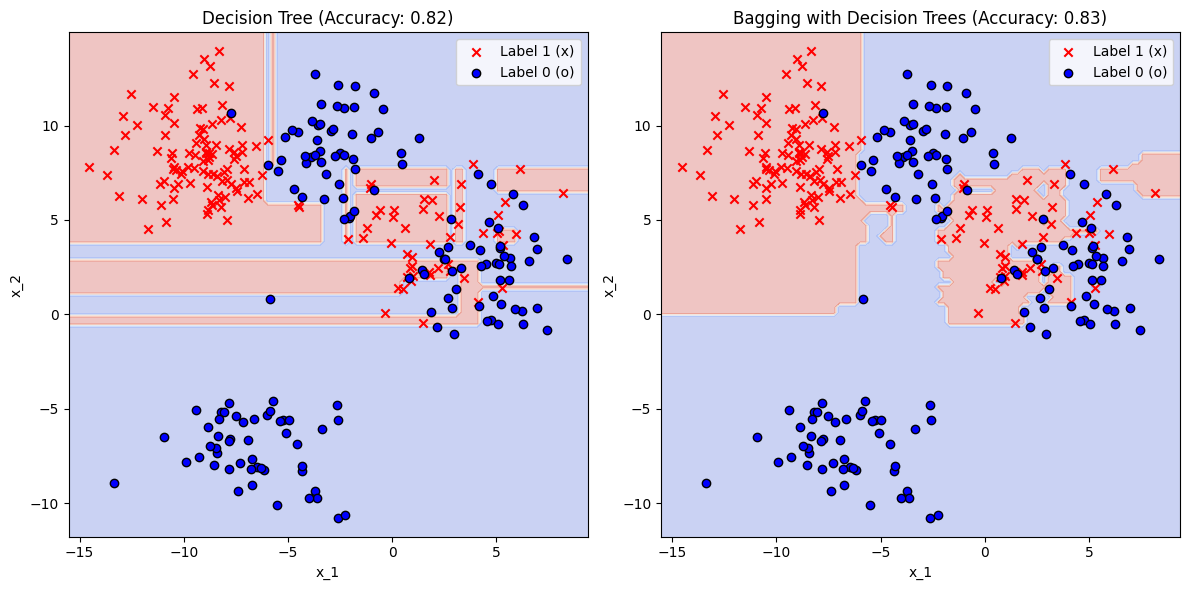

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate synthetic 2-labeled data with 6 blobs
X, y = make_blobs(n_samples=300, centers=6, random_state=42, cluster_std=2.0)

# Map labels to 0 or 1 (binary classification)
y = np.where(y < 3, 0, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DecisionTreeClassifier
base_classifier = DecisionTreeClassifier()

# Create a BaggingClassifier with decision trees
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=200, random_state=42)

# Train the classifiers on the training data
base_classifier.fit(X_train, y_train)
bagging_classifier.fit(X_train, y_train)

# Predict labels for the test data
y_pred_base = base_classifier.predict(X_test)
y_pred_bagging = bagging_classifier.predict(X_test)

# Calculate accuracies
accuracy_base = accuracy_score(y_test, y_pred_base)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)

# Create a meshgrid for plotting
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot decision boundaries and data points for Decision Tree (left subplot)
Z_base = base_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z_base = Z_base.reshape(xx.shape)
axes[0].contourf(xx, yy, Z_base, alpha=0.3, cmap='coolwarm')
axes[0].set_title(f'Decision Tree (Accuracy: {accuracy_base:.2f})')
axes[0].set_xlabel('x_1')
axes[0].set_ylabel('x_2')

# Plot data points
scatter1_base = axes[0].scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='red', marker='x', cmap='coolwarm', edgecolor='k', label='Label 1 (x)')
scatter0_base = axes[0].scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='blue', marker='o', cmap='coolwarm', edgecolor='k', label='Label 0 (o)')

# Add legend to the left subplot
axes[0].legend(handles=[scatter1_base, scatter0_base], labels=['Label 1 (x)', 'Label 0 (o)'])

# Plot decision boundaries and data points for Bagging (right subplot)
Z_bagging = bagging_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z_bagging = Z_bagging.reshape(xx.shape)
axes[1].contourf(xx, yy, Z_bagging, alpha=0.3, cmap='coolwarm')
axes[1].set_title(f'Bagging with Decision Trees (Accuracy: {accuracy_bagging:.2f})')
axes[1].set_xlabel('x_1')
axes[1].set_ylabel('x_2')

# Plot data points
scatter1_bagging = axes[1].scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='red', marker='x', cmap='coolwarm', edgecolor='k', label='Label 1 (x)')
scatter0_bagging = axes[1].scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='blue', marker='o', cmap='coolwarm', edgecolor='k', label='Label 0 (o)')

# Add legend to the right subplot
axes[1].legend(handles=[scatter1_bagging, scatter0_bagging], labels=['Label 1 (x)', 'Label 0 (o)'])

plt.tight_layout()
plt.show()
